# Liner Regression with Cross Validation

In [1]:
#import required packages
import numpy as np
import pandas as pd


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from itertools import chain, combinations


In [4]:
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score



In [5]:
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")


## Import the Data File

In [6]:
df = pd.read_csv("final_final.csv",header=0)
df

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq
0,1,0,0,0,0,0,0,0,0,0,...,0.191654,0.190696,0.163497,0.028157,0.000000,0.000000,0.000000,0.005612,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0.033111,0.033111,0.014983,0.014284,0.000000,0.003843,0.000036,0.003928,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0.209896,0.209896,0.167713,0.042183,0.000000,0.000000,0.000000,0.045416,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0.217492,0.217492,0.177889,0.039302,0.000302,0.000000,0.000000,0.006359,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0.038127,0.038127,0.026261,0.011866,0.000000,0.000000,0.000000,0.000797,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,0,0,0,0,0,0,0,...,0.036356,0.036356,0.028879,0.007298,0.000179,0.000000,0.000000,0.000191,0,0
996,1,0,0,0,0,0,0,0,0,0,...,0.152640,0.152640,0.144344,0.008297,0.000000,0.000000,0.000000,0.032419,0,0
997,1,0,0,0,0,0,0,0,0,0,...,0.266381,0.265700,0.245383,0.020998,0.000000,0.000000,0.000000,0.179580,0,0
998,0,0,0,1,0,0,0,0,0,0,...,0.346636,0.325744,0.193050,0.153586,0.000000,0.000000,0.000000,0.007226,0,0


In [7]:
#select the dependent(X) and independent variable (y)
X = df[['grade_C','grade_D','grade_E',
        'grade_F','grade_G','total_rec_int',
        'total_pymnt_inv','funded_amnt_inv','sub_grade_B5',
        'sub_grade_C5','sub_grade_C4','sub_grade_B4','sub_grade_D5','sub_grade_C3']].values

y = df[['int_rate']].values

In [8]:
#split the data in train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [9]:
#train the linear regression model
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
#predict the interest rate
predictions = lm.predict(X_test)
predictionx = lm.predict(X_train)

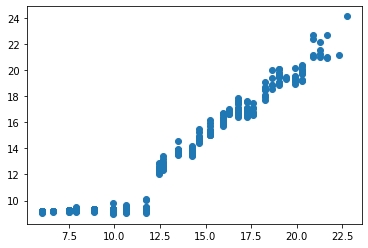

In [11]:
#plot the graph for relation ,on x-axis in is actuall interest rate and on the y axis there is predected interested rate
plt.scatter(y_test,predictions)

In [12]:
#calculate the r-square score
from sklearn.metrics import *
r2_score(y_test,predictions)

0.9139731565540277

In [13]:
# Calculate the absolute errors 
errors = abs(predictions - y_test) 
# Print out the mean absolute error (mae) 
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.84 degrees.


In [14]:
# Calculate mean absolute percentage error (MAPE) 
mape = 100 * (errors / y_test) 
#print('MAPE:',mape)
# Calculate and display accuracy 
accuracy = 100 - np.mean(mape) 
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 91.34 %.


In [15]:
test_int = y_test.tolist()

In [16]:
train_int = y_train.tolist()

In [17]:
#calculate mape
mape = np.mean(np.abs((test_int-predictions) / test_int)) * 100
print('MAPE of test data:',mape)
mape1 = np.mean(np.abs((train_int-predictionx) / train_int)) * 100
print('MAPE of train data:',mape1)

MAPE of test data: 8.661827417121426
MAPE of train data: 8.402658946009943


## We will map the residual against the predicted value ---the output is random and close to 0 

Text(0, 0.5, 'residuals')

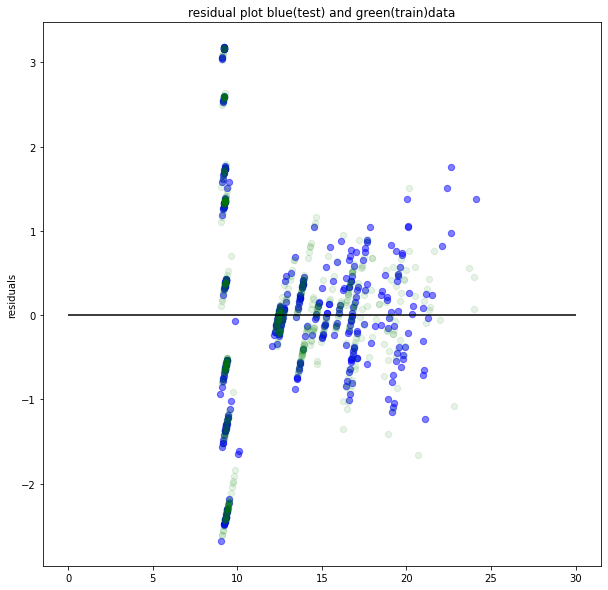

In [18]:
#plot the graph on x-axis there is predicted interest rate and on y-axis there is residual which means difference,
#the green colour are train data and blue is test data
plt.figure(figsize = (10,10))
plt.scatter(lm.predict(X_test),lm.predict(X_test) - test_int,c='b',s=40,alpha=0.5)
plt.scatter(lm.predict(X_train),lm.predict(X_train) - train_int,c='g',s=40,alpha=0.1)
plt.hlines(y=0,xmin=0,xmax=30)
plt.title('residual plot blue(test) and green(train)data')
plt.ylabel('residuals')

### Calculte mape after 5 fold CV

In [19]:

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from math import fabs
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cvscores =[]
kf = KFold(n_splits=5, random_state=42, shuffle=True)
i=1
model = LinearRegression()

for train_index, test_index in kf.split(X):
    X_trainD, X_testD = X[train_index], X[test_index]
    y_trainD, y_testD = y[train_index], y[test_index]
    i=i+(int(len(X_train)/5))
    model = LinearRegression()
    model.fit(X_trainD, y_trainD)
    pred= model.predict(X_testD)
    mape=np.mean(np.abs((y_testD-pred) / y_testD)) * 100
    cvscores.append(mape)
mape=np.mean(cvscores)
print('MAPE after 5 fold cross validation :')
print(mape)


MAPE after 5 fold cross validation :
8.510868265774642


After 5 fold cross validation the MAPE value changed by 0.01